# Einführung in Python für die Computational Social Science (CSS)

## Jonas Volle
Wissenschaftlicher Mitarbeiter  
Chair of Methodology and Empirical Social Research  
Otto-von-Guericke-Universität

[jonas.volle@ovgu.de](mailto:jonas.volle@ovgu.de)

**Sprechstunde**: individuell nach vorheriger Anmeldung per [Mail](mailto:jonas.volle@ovgu.de)

Samstag, 17.06.2023

**Quelle:** Ich orientiere mich für diese Sitzung am Kapitel 6 aus dem Buch:  

McLevey, John. 2021. Doing Computational Social Science: A Practical Introduction. 1st ed. Thousand Oaks: SAGE Publications.

# Tag 2: Datenmanagement mit Pandas

## Inhalt

- Datenstruktur
- Import und Export verschiedener Dateiformate (csv, excel, etc.)
- pandas DataFrame
- Spalten (columns) auswählen
- Zeilen (rows) filtern
- Aggregierung und Gruppierung
- Fehlende Daten
- Merging


Nun verwenden wir Python nicht mehr als allgemeine Programmiersprache, sondern zur Verarbeitung von Daten mit Hilfe spezieller Datenverwaltungs- und -analysepakete. Wir werden uns in erster Linie auf ein Paket namens *Pandas* stützen. Pandas wurde von Wes McKinney für die Analyse von Paneldaten entwickelt (daher der Name). Es verfügt über spezielle Datenstrukturen, Funktionen und Methoden, mit denen Sie die meisten Datenverarbeitungsvorgänge für strukturierte quantitative Daten erledigen können.

Pandas Dokumentation: https://pandas.pydata.org/docs/reference/index.html

## Import

In [2]:
import pandas as pd

## Datenimport mit pandas

Das Pandas-Paket macht es einfach, Daten aus einer externen Datei direkt in ein Dataframe-Objekt zu laden.

| Datentyp | Reader | Writer |
|----------|----------|----------|
| CSV    | `read_csv()`   | `to_csv()`   |
| JSON    | `read_json()`   | `to_json()`   |
| Stata   | `read_stata()`   | `to_stata()`   |
| SAS   | `read_sas()`   | NA   |
| SPSS   | `read_spss()`   | NA   |


In diesem Kapitel werden Daten aus dem VDEM-Datensatz (Varieties of Democracy) verwendet. VDEM ist ein laufendes Forschungsprojekt zur Messung des Niveaus der Demokratie in Regierungen auf der ganzen Welt, und es werden laufend aktualisierte Versionen des Datensatzes veröffentlicht. Die Forschung wird von einem Team aus mehr als 50 Sozialwissenschaftlern geleitet, die die Sammlung und Analyse von Experteneinschätzungen von mehr als 3200 Historikern und Länderexperten koordinieren. Auf der Grundlage dieser Einschätzungen hat das VDEM-Projekt eine bemerkenswert komplexe Reihe von Indikatoren entwickelt, die sich an fünf übergeordneten Facetten der Demokratie orientieren: Wahldemokratie, liberale Demokratie, partizipative Demokratie, deliberative Demokratie und egalitäre Demokratie. Der Datensatz reicht bis ins Jahr 1789 zurück und gilt als Goldstandard für quantitative Daten über globale demokratische Entwicklungen.  

Das Codebuch finden Sie hier: https://v-dem.net/documents/24/codebook_v13.pdf

In [3]:
pd.read_csv?

In [4]:
df = pd.read_csv('../data/vdem/V-Dem-CY-Full+Others-v10.csv',
                low_memory=False)

Wie viele Zeilen und Spalten? Das geht mit der `.shape` Methode.

In [6]:
df.shape

(27013, 48)

Welche Variablen benötigen wir? Wir wählen Spalten in einem DataFrame aus, indem wir den DataFrame aufrufen gefolt mit einer Liste in eckigen Klammern, die die Namen der Spalten enthält.

In diesem Fall möchten wir die folgenden Variablen behalten: 

1. den Ländernamen 
2. die Länder-ID 
3. die geografische Region 
4. Die Länder-ID 
3. die geographische Region 
4. Das Jahr 5. Der Polyarchie-Index 
6. Der Index der liberalen Demokratie
7. Der Index der partizipativen Demokratie 
8. Der Index der deliberativen Demokratie 
9. Der Index der egalitären Demokratie 
10. Ob die Privatsphäre der Internetnutzer und ihre Daten rechtlich geschützt sind 
11. Wie polarisiert das Land in politischen Fragen ist 
12. Ausmaß der politischen Gewalt 
13. Ob das Land eine Demokratie ist oder nicht 


In [7]:
subset_vars = ['country_name', 'country_text_id', 'e_regiongeo', 
               'year', 'v2x_polyarchy', 'v2x_libdem', 'v2x_partipdem', 
               'v2x_delibdem', 'v2x_egaldem', 'v2smprivex', 'v2smpolsoc', 
               'v2caviol', 'e_boix_regime']

sdf = df[subset_vars]

In [8]:
sdf.shape

(27013, 13)

Wir können die Namen der Spalten (columns) mithilfe des Attributs `.columns` für den DataFrame ausdrucken:

In [9]:
list(sdf.columns)

['country_name',
 'country_text_id',
 'e_regiongeo',
 'year',
 'v2x_polyarchy',
 'v2x_libdem',
 'v2x_partipdem',
 'v2x_delibdem',
 'v2x_egaldem',
 'v2smprivex',
 'v2smpolsoc',
 'v2caviol',
 'e_boix_regime']

### Was ist im DataFrame?

Mit der Methode `.info()` können wir die Gesamtzahl der Beobachtungen, die Gesamtzahl der Spalten, die Namen der Spalten, die Anzahl der nicht fehlenden Beobachtungen für jede Variable, den Datentyp für jede Variable, die Anzahl der Variablen, die Daten jedes Typs enthalten (z. B. Ganzzahlen und Fließkommazahlen), und die Gesamtmenge des vom DataFrame verwendeten Speichers anzeigen:

In [10]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27013 entries, 0 to 27012
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_name     27013 non-null  object 
 1   country_text_id  27013 non-null  object 
 2   e_regiongeo      27013 non-null  int64  
 3   year             27013 non-null  int64  
 4   v2x_polyarchy    25342 non-null  float64
 5   v2x_libdem       24350 non-null  float64
 6   v2x_partipdem    24923 non-null  float64
 7   v2x_delibdem     18557 non-null  float64
 8   v2x_egaldem      18557 non-null  float64
 9   v2smprivex       3562 non-null   float64
 10  v2smpolsoc       3562 non-null   float64
 11  v2caviol         12745 non-null  float64
 12  e_boix_regime    16270 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 2.7+ MB


Die Datentypen in diesem Datenrahmen sind float64 (Zahlen mit Nachkommastellen), int64 (Ganzzahlen) und object. In Pandas bezieht sich object auf Spalten, die Strings oder gemischte Typen wie Strings und Integers enthalten (object umfasst auch viele andere Dinge: es ist eine Sammelkategorie). Pandas kann auch mit Booleans (Wahr oder Falsch), kategorischen Variablen und einigen speziellen Datetime-Objekten arbeiten. Erinnern Sie sich daran, wie wir die Spalten für unser Dataset ausgewählt haben. Im folgenden Code verwende ich dieselbe Idee, um nur einige wenige Variablen anzuzeigen. Wir werden dies später in diesem Kapitel noch etwas genauer erklären.

Wir können auch die Methode `.describe()` verwenden, um zusammenfassende Informationen über die quantitativen Variablen in unserem Datensatz zu erhalten, einschließlich der Anzahl der nicht fehlenden Informationen, des Mittelwerts und der Standardabweichung.


In [11]:
sdf[['e_regiongeo', 'year', 'v2x_polyarchy']].describe()

,e_regiongeo,year,v2x_polyarchy
count,27013.000000,27013.000000,25342.000000
mean,9.266575,1926.556177,0.262821
std,5.733007,63.754335,0.260966
min,1.000000,1789.000000,0.007000
25%,4.000000,1878.000000,0.057000
50%,8.000000,1937.000000,0.171500
75%,14.000000,1980.000000,0.367000
max,19.000000,2019.000000,0.924000


### Heads, tails, and samples

Wir können auch den "Kopf" oder das "Ende" unseres Datenrahmens mit den Methoden `.head() ` und `.tail()` untersuchen, die standardmäßig die ersten oder letzten fünf Zeilen in einem DataFrame verwenden, es sei denn, Sie geben eine andere Zahl als Argument an, wie z. B. `.head(10)`:

In [12]:
sdf[['country_name', 'year', 'v2x_libdem']].head()

,country_name,year,v2x_libdem
0,Mexico,1789,0.043
1,Mexico,1790,0.040
2,Mexico,1791,0.040
3,Mexico,1792,0.040
4,Mexico,1793,0.040


In [13]:
sdf[['country_name', 'year', 'v2x_libdem']].tail(3)

,country_name,year,v2x_libdem
27010,Piedmont-Sardinia,1859,0.150
27011,Piedmont-Sardinia,1860,0.148
27012,Piedmont-Sardinia,1861,0.149


Wenn Sie eine Zufallsstichprobe von Zeilen bevorzugen, können Sie die Methode `.sample()` verwenden, bei der Sie die Anzahl der Zeilen angeben müssen, die Sie abfragen möchten:

In [14]:
sdf[['country_name', 'year', 'v2x_libdem']].sample(15)

,country_name,year,v2x_libdem
23607,Paraguay,1847,0.021
9175,Zimbabwe,1997,0.206
17683,Madagascar,1854,0.015
25515,Zanzibar,1912,0.075
24006,Romania,2015,0.578
24294,Saudi Arabia,1955,0.033
20262,Cuba,1967,0.044
17414,Laos,1934,0.063
17505,Libya,1794,NaN
11084,Ecuador,1973,0.067


### Zeilen filtern

Bei der Ausführung der Methode `.describe()` haben Sie vielleicht bemerkt, dass der Bereich für die Jahresvariable 1789-2019 ist. Angenommen, wir haben einen guten Grund, uns auf die Jahre von 1900 bis 2019 zu konzentrieren. Dann müssen wir die Daten filtern, um nur die Zeilen zu erhalten, die unseren Anforderungen entsprechen. Es gibt mehrere Möglichkeiten, Zeilen zu filtern, einschließlich Slices (z. B. alle Beobachtungen zwischen Index i und Index j) oder nach einer expliziten Bedingung, wie z. B. "Zeilen, in denen das Jahr >= 1900". Beachten Sie, dass, wenn wir einen DataFrame filtern oder zerschneiden, das neue Objekt nur eine Ansicht des Originals ist und sich immer noch auf die gleichen Daten bezieht. Pandas warnt uns, wenn wir versuchen, das gefilterte Objekt zu verändern, so dass es in den meisten Fällen einfacher ist, eine neue Kopie zu erstellen.

In [15]:
fsdf = sdf[sdf['year'] >= 1900].copy()
fsdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18787 entries, 111 to 25622
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_name     18787 non-null  object 
 1   country_text_id  18787 non-null  object 
 2   e_regiongeo      18787 non-null  int64  
 3   year             18787 non-null  int64  
 4   v2x_polyarchy    18663 non-null  float64
 5   v2x_libdem       18424 non-null  float64
 6   v2x_partipdem    18587 non-null  float64
 7   v2x_delibdem     18557 non-null  float64
 8   v2x_egaldem      18557 non-null  float64
 9   v2smprivex       3562 non-null   float64
 10  v2smpolsoc       3562 non-null   float64
 11  v2caviol         12745 non-null  float64
 12  e_boix_regime    11841 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 2.0+ MB


Wir könnten dies auch mit der Methode `.query()` tun, die einen booleschen Ausdruck als string annimmt:

In [16]:
alternate_fsdf = sdf.query('year >= 1900').copy() 
alternate_fsdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18787 entries, 111 to 25622
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_name     18787 non-null  object 
 1   country_text_id  18787 non-null  object 
 2   e_regiongeo      18787 non-null  int64  
 3   year             18787 non-null  int64  
 4   v2x_polyarchy    18663 non-null  float64
 5   v2x_libdem       18424 non-null  float64
 6   v2x_partipdem    18587 non-null  float64
 7   v2x_delibdem     18557 non-null  float64
 8   v2x_egaldem      18557 non-null  float64
 9   v2smprivex       3562 non-null   float64
 10  v2smpolsoc       3562 non-null   float64
 11  v2caviol         12745 non-null  float64
 12  e_boix_regime    11841 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 2.0+ MB


### Schreiben von Dateien

So wie wir unsere ursprüngliche CSV-Datei mit der Funktion `read_csv()` in Pandas eingelesen habe, können wir diesen neuen Dataframe mit der Methode `to_csv()` auch wieder schreiben:

In [34]:
fsdf.to_csv('../data/vdem/filtered_subset.csv', index=False)

## Pandas Datenstruktur

### The series

Jede Spalte in einem dataframe ist ein Objekt namens Series. Eine Series ist ein eindimensionales Objekt (z. B. ein Zahlenvektor) mit einem Index, der selbst ein Vektor oder ein Array von Bezeichnungen ist.

Zum Beispiel ist die Spalte *v2x_delibdem* in fsdf eine Series, die Floats und die Indexbezeichnung für jede Beobachtung enthält. Wenn ich eine Stichprobe von 15 Beobachtungen ausdrucke, erhalte ich einen numerischen Index für jede Beobachtung auf der linken Seite und den tatsächlichen Wert auf der rechten Seite. Die Indexwerte sind in der Series selbst geordnet, aber hier sind sie nicht in der richtigen Reihenfolge, weil wir eine Zufallsstichprobe gezogen haben. Da dies nur zu Demonstrationszwecken dient, habe ich einen random_state-Wert eingefügt, um sicherzustellen, dass Sie die gleiche Stichprobe erhalten wie ich, wenn Sie diesen Block erneut ausführen.

In [18]:
fsdf['v2x_delibdem']

111      0.034
112      0.034
113      0.034
114      0.034
115      0.034
         ...  
25618    0.215
25619    0.194
25620    0.168
25621    0.213
25622    0.183
Name: v2x_delibdem, Length: 18787, dtype: float64

In [17]:
fsdf['v2x_delibdem'].sample(15, random_state = 42)

8437     0.305
25197    0.059
6661     0.079
19266    0.390
7633     0.632
1230     0.727
8829     0.020
10118    0.008
8996     0.047
2360     0.048
18407    0.018
153      0.132
10794    0.805
14375    0.800
24240      NaN
Name: v2x_delibdem, dtype: float64

In den meisten Fällen ist der Standardindex für eine Series oder einen DataFrame ein unveränderlicher Vektor aus ganzen Zahlen:

In [36]:
fsdf.index

Index([  111,   112,   113,   114,   115,   116,   117,   118,   119,   120,
       ...
       25613, 25614, 25615, 25616, 25617, 25618, 25619, 25620, 25621, 25622],
      dtype='int64', length=18787)

Wir können einen Index leicht so ändern, dass er stattdessen aus einem anderen Vektortyp besteht, z. B. einem string. Überraschenderweise müssen Indexwerte nicht eindeutig sein. Dies ermöglicht einige leistungsfähige Techniken, aber die meiste Zeit sollten Sie vermeiden, Indizes manuell zu ändern.

### Zugriff auf eine bestimmte Zeile über ihren Index

Wir können den Index verwenden, um bestimmte Zeilen aus einem dataframe oder bestimmte Werte aus einer series abzurufen, ganz so, als ob wir ein Element aus einer Liste, einem Tupel oder einem Array auswählen würden. Am einfachsten geht das, indem man den Indexwert (z. B. 202) an `.loc[]` übergibt. Wie Sie unten sehen können, ist das Ergebnis der beobachtungsspezifische Wert für jede Variable im dataframe:

In [40]:
fsdf.loc[202]

country_name       Mexico
country_text_id       MEX
e_regiongeo            17
year                 1991
v2x_polyarchy       0.435
v2x_libdem          0.221
v2x_partipdem       0.246
v2x_delibdem         0.31
v2x_egaldem         0.214
v2smprivex            NaN
v2smpolsoc            NaN
v2caviol            -0.71
e_boix_regime         0.0
Name: 202, dtype: object

In [41]:
fsdf['v2x_delibdem'].loc[202]

0.31

In [42]:
fsdf['v2x_delibdem'].loc[20000]

0.081

Beachten Sie, dass sich `.loc` nicht auf die 202. Zeile des dataframe bezieht. Wenn Sie sich den obigen `.index`-Befehl genau angesehen haben, ist Ihnen vielleicht aufgefallen, dass der dataframe nur 18.787 Zeilen enthält, aber `.loc` immer noch Zeile 20.000 zurückgeben kann - der Index hat sich nicht geändert, als Sie eine Reihe von Zeilen aus dem dataframe entfernt haben. Stellen Sie sich `.loc` als Zugriff auf ein Wörterbuch der Indexwerte vor - es gibt sogar einen KeyError, wenn Sie nach einem Element fragen, das nicht existiert.

Wenn wir stattdessen auf die n-te Zeile eines dataframe zugreifen wollen, können wir `.iloc[n]` verwenden. Stellen Sie sich den Index als eine Liste vor, und Sie beziehen sich auf ein Element dieser Liste durch seinen Listenindex. Verwenden wir `.iloc`, um das letzte Element im dataframe auszuwählen. Beachten Sie, dass die Indexposition für das letzte Element 18.786 sein wird, obwohl die Länge des dataframe 18.787 beträgt, da Python-Datenstrukturen fast immer mit einem Null-Index versehen sind. Hier sehen Sie den Index der Zeile, der früher die Zeilennummer war, als Name am unteren Rand:

In [21]:
len(fsdf)

18787

In [24]:
fsdf.iloc[18786]

country_name       Zanzibar
country_text_id         ZZB
e_regiongeo               8
year                   2019
v2x_polyarchy         0.245
v2x_libdem             0.18
v2x_partipdem         0.083
v2x_delibdem          0.183
v2x_egaldem           0.187
v2smprivex           -1.843
v2smpolsoc           -0.848
v2caviol             -0.181
e_boix_regime           NaN
Name: 25622, dtype: object

In [20]:
fsdf.tail()

,country_name,country_text_id,e_regiongeo,year,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2smprivex,v2smpolsoc,v2caviol,e_boix_regime
25618,Zanzibar,ZZB,8,2015,0.316,0.240,0.114,0.215,0.255,-1.749,-0.210,-0.321,NaN
25619,Zanzibar,ZZB,8,2016,0.267,0.212,0.090,0.194,0.234,-1.749,-1.512,-0.181,NaN
25620,Zanzibar,ZZB,8,2017,0.260,0.171,0.097,0.168,0.213,-1.749,-1.512,-0.181,NaN
25621,Zanzibar,ZZB,8,2018,0.262,0.170,0.095,0.213,0.214,-1.749,-1.389,-0.181,NaN
25622,Zanzibar,ZZB,8,2019,0.245,0.180,0.083,0.183,0.187,-1.843,-0.848,-0.181,NaN


Wenn es keinen Grund gibt, die ursprüngliche Indizierung des ungefilterten dataframe beizubehalten, ist es in der Regel eine gute Idee, den Index zurückzusetzen:

In [25]:
fsdf.reset_index(inplace = True, drop = True) 
fsdf.loc[18786]

country_name       Zanzibar
country_text_id         ZZB
e_regiongeo               8
year                   2019
v2x_polyarchy         0.245
v2x_libdem             0.18
v2x_partipdem         0.083
v2x_delibdem          0.183
v2x_egaldem           0.187
v2smprivex           -1.843
v2smpolsoc           -0.848
v2caviol             -0.181
e_boix_regime           NaN
Name: 18786, dtype: object

Danach werden `.loc` und `.iloc` ziemlich austauschbar, mit ein paar Ausnahmen: `.loc` hat wörterbuchähnliche Fähigkeiten, während `.iloc` eher listenähnlich ist. Schauen wir uns nun den dataframe genauer an.

### Dataframes

Dataframes in Pandas sind eigentlich nur Sammlungen von Series, die an denselben Indexwerten ausgerichtet sind. Mit anderen Worten: Die Serien, mit denen wir zuvor gearbeitet haben, haben ihre eigenen Indizes, wenn wir mit ihnen als eigenständige Serien arbeiten, aber im fsdf dataframe teilen sie sich einen Index.  
Wie Sie bereits gesehen haben, sind dataframes mit Variablen in den Spalten und Beobachtungen in den Zeilen organisiert, und Sie können eine einzelne series aus einem dataframe mit eckigen Klammern holen - lassen Sie uns das jetzt mit dem fsdf dataframe tun:

In [56]:
deliberative = fsdf['v2x_delibdem']

Beachten Sie, dass wir auch die Punktnotation verwenden können, um Spalten auszuwählen. `fsdf.v2x_delibdem` ist funktional gleichwertig mit `fsdf['v2x_delibdem']` und kann austauschbar verwendet werden.

Wir sind nicht darauf beschränkt, Spalten auszuwählen, die bereits in unserem Datensatz vorhanden sind. Sie können auch neue Spalten erstellen und hinzufügen. Sie können beispielsweise eine neue Spalte mit der Bezeichnung "21. Jahrhundert" erstellen und einen booleschen Wert zuweisen, der darauf basiert, ob die Beobachtung in den 2000er Jahren liegt:

In [57]:
fsdf['21 Century'] = fsdf['year'] >= 2000 
fsdf[['21 Century']].value_counts()

21 Century
False         15225
True           3562
Name: count, dtype: int64

Manchmal handelt es sich bei den neu erstellten Spalten um Umwandlungen einer bereits im dataframe vorhandenen series. Sie können beispielsweise eine neue Spalte "missing_political_violence_data" erstellen, die den Wert "True" annimmt, wenn die Serie "v2caviol" (Ausmaß der politischen Gewalt) leer ist, und andernfalls "False":

In [58]:
fsdf['missing_political_violence_data'] = fsdf['v2caviol'].isna()
fsdf['missing_political_violence_data'].value_counts()

missing_political_violence_data
False    12745
True      6042
Name: count, dtype: int64

Wie Sie bei der Ausführung von value_counts() sehen können, fehlen für 6042 Beobachtungen Daten zum Ausmaß der politischen Gewalt.

### Missing data

Es ist wichtig zu verstehen, wie mit fehlenden Daten umgegangen wird. Fehlende Daten kommen in realen Datensätzen häufig vor, und sie können aus mehreren Gründen fehlen! Im Allgemeinen verwendet Pandas den Wert np.nan, um fehlende Daten darzustellen. Der np.nan-Wert von NumPy ist ein Spezialfall einer Fließkommazahl, die einen nicht darstellbaren Wert darstellt. Diese Art von Werten werden NaNs (Not a Number) genannt.

In [45]:
import numpy as np 
type(np.nan)

float

np.nan kann nicht in Gleichheitstests verwendet werden, da jeder Vergleich mit einem np.nan-Wert als Falsch ausgewertet wird. Dies schließt den Vergleich von np.nan mit sich selbst ein.  

np.nan-Werte werden nicht zu False oder None ausgewertet. Dies kann es schwierig machen, fehlende Werte zu unterscheiden. Zu diesem Zweck können Sie die Funktion np.isnan() verwenden, die besonders im Kontrollfluss nützlich ist.

In [60]:
if np.nan is None: 
    print('NaN is None') 
if np.nan: 
    print('NaN evaluates to True in control flow') 
if np.isnan(np.nan): 
    print('NaN is considered a NaN value in NumPy')

NaN evaluates to True in control flow
NaN is considered a NaN value in NumPy


Außerdem werden np.nan-Werte im Allgemeinen von Pandas-Funktionen ausgeschlossen, die Berechnungen über dataframes, Zeilen oder Spalten durchführen. In der Dokumentation wird zum Beispiel oft angegeben, dass eine Berechnung über alle Werte durchgeführt wird, wobei NaN- oder NULL-Werte ausgeschlossen werden.

In [61]:
total = len(fsdf['v2caviol']) 
count = fsdf['v2caviol'].count() 
print(f'Total: {total}') 
print(f'Count: {count}') 
print(f'Diff: {total-count}')

Total: 18787
Count: 12745
Diff: 6042


Die Gesamtzahl der Elemente in der Spalte v2caviol (politische Gewalt) ist viel höher als die von der Funktion `count()` erhaltene Anzahl. Wenn das, was wir oben gelernt haben, richtig ist, sollte dieser Unterschied berücksichtigt werden, wenn wir herausfinden, wie viele Elemente in dieser Spalte NaNs sind.

In [62]:
nans = fsdf['v2caviol'].isna().sum()
print(' NaNs: {}'.format(nans))

 NaNs: 6042


Wie Sie wahrscheinlich wissen, kann die Methode `.isna()`, die der Methode `np.isnan()` ähnelt, aber zusätzliche Fälle abdeckt, beim Transformieren und Filtern von Daten sehr nützlich sein.

### Aggregieren und Gruppieren

Datenanalyseprojekte beinhalten oft Aggregations- oder Gruppierungsoperationen. So kann es beispielsweise erforderlich sein, zusammenfassende Statistiken für Beobachtungen zu berechnen und zu vergleichen, die unterschiedliche Werte für eine kategoriale Variable annehmen. Es kann hilfreich sein, den Datensatz selbst aufzuschlüsseln und Operationen auf verschiedenen Teilmengen von Daten durchzuführen. Dazu verwenden wir die Methode `.groupby()`, die den dataframe auf der Grundlage der Werte einer bestimmten Variable in Gruppen unterteilt. Anschließend können wir Operationen mit den resultierenden Gruppen durchführen. Wir gruppieren unsere Länder in geografische Regionen, indem wir die Variable *e_regiongeo* verwenden:

In [36]:
grouped = fsdf.groupby('e_regiongeo')

Der obige Code gibt ein gruppiertes Objekt zurück, mit dem wir arbeiten können. Nehmen wir an, wir wollen eine bestimmte Gruppe herausziehen, z. B. Südostasien, die in den Daten mit der numerischen ID 13 dargestellt wird. Ich weiß das, weil die entsprechenden Informationen im VDEM-Codebuch zu finden sind, das Sie bei Ihrer Arbeit mit den VDEM-Daten immer geöffnet halten sollten.

Wir können die Methode get_group() verwenden, um eine Gruppe aus dem gruppierten Objekt zu ziehen. (Beachten Sie, dass der nachstehende Code .get_group() fsdf[fsdf['e_regiongeo'] == 13] entspricht).

In [37]:
south_east_asia = grouped.get_group(13)

In [38]:
south_east_asia[['country_name', 'year', 'e_boix_regime']].head()

,country_name,year,e_boix_regime
838,Burma/Myanmar,1900,NaN
839,Burma/Myanmar,1901,NaN
840,Burma/Myanmar,1902,NaN
841,Burma/Myanmar,1903,NaN
842,Burma/Myanmar,1904,NaN


Bei den in south_east_asia gespeicherten Daten handelt es sich um alle Beobachtungen der südostasiatischen Länder in den VDEM-Daten, die nun in einem eigenen dataframe gespeichert sind. .get_group() ist eine weitere Möglichkeit, eine Teilmenge eines dataframes zu extrahieren (mit Hilfe eines groupby-Objekts), und ist besonders nützlich, wenn die Teilmenge der Daten, mit der Sie arbeiten möchten, nur Beobachtungen mit einem bestimmten Wert für eine kategoriale Variable in Ihren Daten sind. Wenn wir einen Datensatz auf diese Weise gruppieren, geschieht dies im Allgemeinen, weil wir etwas für eine Gruppe innerhalb des Datensatzes oder für mehrere Gruppen, die wir vergleichen möchten, berechnen möchten. Dazu geben wir das gruppierte Objekt, die Serie, für die wir eine Operation durchführen möchten, und schließlich die Operation, die wir durchführen möchten, an. Berechnen wir zum Beispiel den Median des Polyarchie-Scores für Länder in jeder der Regionen im Datensatz:

In [39]:
poly = grouped['v2x_polyarchy'].median() 
poly.head()

e_regiongeo
1    0.7940
2    0.8170
3    0.3890
4    0.2385
5    0.0955
Name: v2x_polyarchy, dtype: float64

Es wäre nützlicher, den Namen der Region zu sehen als ihre numerische Bezeichnung. Wir können dies erreichen, indem wir ein Wörterbuch erstellen, das die numerischen IDs auf den Regionsnamen abbildet, und dann die Methode .map() verwenden, um Pandas mitzuteilen, wo es die Werte nachschlagen soll, die es benötigt, um eine neue Spalte mit den Ländernamen zu erstellen. Zuerst das Wörterbuch:

In [40]:
regions = { 1:'Western Europe', 
           2:'Northern Europe', 
           3:'Southern Europe', 
           4:'Eastern Europe', 
           5:'Northern Africa',
           6:'Western Africa', 
           7:'Middle Africa', 
           8:'Eastern Africa', 
           9:'Southern Africa', 
           10:'Western Asia', 
           11:'Central Asia', 
           12:'East Asia', 
           13:'South-East Asia', 
           14:'South Asia', 
           15:'Oceania', # (including Australia and the Pacific) 
           16:'North America', 
           17:'Central America', 
           18:'South America', 
           19:'Caribbean' # (including Belize Cuba Haiti Dominican Republic) 
          }

Nun können wir dieses Wörterbuch an die Methode `.map()` übergeben, die auf die Serie `fsdf['e_regiongeo']` angewendet wird, und so eine neue Serie namens `fsdf['Region']` erstellen:

In [41]:
fsdf['Region'] = fsdf['e_regiongeo'].map(regions)

Es ist auch möglich, nach mehreren Variablen zu gruppieren, z. B. nach geografischer Region und Jahr, und dann eine Operation an diesen etwas feineren Gruppen durchzuführen. Auf diese Weise ergeben sich 2211 Gruppen, so dass wir eine Zufallsstichprobe von 10 Gruppen ansehen werden:

In [42]:
grouped = fsdf.groupby(['Region', 'year']) 
poly = grouped['v2x_polyarchy'].median() 
poly.reset_index()
pd.DataFrame(poly).reset_index().sample(10)

,Region,year,v2x_polyarchy
1855,Western Africa,1904,0.0380
1590,South-East Asia,1999,0.3040
2116,Western Europe,1925,0.6400
476,Eastern Africa,1965,0.2025
2019,Western Asia,1948,0.0830
1437,South Asia,1966,0.1410
1342,South America,1991,0.7245
1179,Oceania,1948,0.1660
1037,Northern Europe,1926,0.7140
1919,Western Africa,1968,0.1860


Für das gruppierte Objekt selbst können andere Operationen durchgeführt werden, z. B. die Berechnung der Anzahl der Beobachtungen in jeder Gruppe (entspricht value_counts()):

In [43]:
grouped.size().sort_values(ascending=False)

Region          year
Eastern Africa  2015    20
                2012    20
                2019    20
                2018    20
                2017    20
                        ..
Central Asia    1904     1
                1903     1
                1902     1
                1901     1
                1914     1
Length: 2211, dtype: int64

Schließlich können wir mit der Methode `agg()` mehrere Operationen auf ein gruppiertes Objekt anwenden. Die `agg()`-Methode wendet eine oder mehrere Aggregatfunktionen auf ein gruppiertes Objekt an und gibt die Ergebnisse der einzelnen Funktionen zurück:

In [61]:
with_agg = grouped['v2x_polyarchy'].agg([min, np.median, 'max', 'count']) 
with_agg.reset_index().sample(10)

,Region,year,min,median,max,count
249,Central Asia,1909,NaN,NaN,NaN,0
335,East Asia,1944,0.015,0.0805,0.147,6
1373,South Asia,1902,0.010,0.0330,0.146,7
1856,Western Africa,1905,0.016,0.0365,0.213,12
389,East Asia,1998,0.089,0.6550,0.873,7
377,East Asia,1986,0.096,0.1820,0.840,7
1014,Northern Europe,1903,0.265,0.3955,0.615,6
1736,Southern Europe,1905,0.091,0.1910,0.399,7
1395,South Asia,1924,0.010,0.1040,0.257,7
1058,Northern Europe,1947,0.707,0.7940,0.900,7


Wir können sogar unsere eigene Funktion definieren, die agg() verwenden soll! Wenn wir bereit sind, ein Wörterbuch zu übergeben, können wir mit .agg() auch verschiedene Funktionen auf mehrere Variablen gleichzeitig anwenden! Anstatt eine Liste pro Funktion zu übergeben, können Sie ein Wörterbuch verwenden, in dem die Spaltennamen die Schlüssel und die Funktionen die Werte sind (Sie können auch eine Liste von Funktionen übergeben), um eine wirklich komplexe Aggregation in einer einzigen Codezeile durchzuführen.

## Arbeiten mit Zeitreihendaten

Viele reale Datensätze enthalten eine zeitliche Komponente. Dies gilt vor allem dann, wenn Sie mit Daten aus dem Internet arbeiten, die möglicherweise genaue Zeitangaben enthalten, z. B. den Zeitpunkt, zu dem eine E-Mail gesendet oder eine Nachricht veröffentlicht wurde. Strings werden oft verwendet, um Daten und Zeiten zu speichern, aber das ist nicht ideal. Es ist schwierig, Datumsangaben zu sortieren, wenn sie in Strings mit seltsamen Formaten gespeichert sind, z. B.,

In [75]:
"Monday Mar 2, 1999" > "Friday Feb 21, 2020"

True

Das Extrahieren von Merkmalen wie Tag, Monat oder Zeitzone aus Strings kann zeitaufwändig und fehleranfällig sein. Aus diesem Grund haben Pandas und Python spezielle Typen für Datums-/Zeitobjekte implementiert, die Timestamp und Datetime heißen.  

Die VDEM-Daten enthalten eine enorme Menge an zeitlichen Daten, allerdings alle auf Jahresebene. Wechseln wir nun zu einem anderen Datensatz, der feinere zeitliche Daten enthält und eher Daten aus dem Internet ähnelt. In diesem Fall werden wir einige Daten über russische Informationsoperationen zur amerikanischen Präsidentschaftswahl 2016 verwenden. Sie können ein wenig über diese Daten im FiveThirtyEight-Blogpost "Why We're Sharing 3 Million Russian Troll Tweets" lesen.


In [77]:
tweets_df = pd.read_csv('../data/russian-troll-tweets/tweets.csv', low_memory=False)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736552 entries, 0 to 736551
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   external_author_id  736552 non-null  object
 1   author              736552 non-null  object
 2   content             736552 non-null  object
 3   region              734245 non-null  object
 4   language            736552 non-null  object
 5   publish_date        736552 non-null  object
 6   harvested_date      736552 non-null  object
 7   following           736552 non-null  int64 
 8   followers           736552 non-null  int64 
 9   updates             736552 non-null  int64 
 10  post_type           324356 non-null  object
 11  account_type        736552 non-null  object
 12  retweet             736552 non-null  int64 
 13  account_category    736552 non-null  object
 14  new_june_2018       736552 non-null  int64 
 15  alt_external_id     736552 non-null  object
 16  tw

Wie Sie sehen können, haben wir zwei Datentypen in unserem dataframe: object und int64. Denken Sie daran, dass Pandas object verwendet, um auf Spalten zu verweisen, die Strings oder gemischte Typen wie Strings und Integer enthalten. In diesem Fall beziehen sie sich auf Strings.

Eine weitere Anmerkung zu diesem Datensatz: Jede Zeile ist ein Tweet von einem bestimmten Konto, aber einige der Variablen beschreiben Attribute der tweetenden Konten, nicht des Tweets selbst. Die Variable Follower beschreibt beispielsweise die Anzahl der Follower, die das Konto zum Zeitpunkt des Tweets hatte. Dies ist sinnvoll, da Tweets keine Follower haben, Konten aber schon. Dies müssen wir bei der Arbeit mit diesem Datensatz im Auge behalten.   

Mit der Funktion to_datetime können wir Datumsstrings aus einer Spalte oder Series in Zeitstempel umwandeln. Das werden wir hier tun, indem wir die neuen datetime-Objekte neuen Variablen zuweisen. Beachten Sie, dass die Ausführung dieses Codes etwas Zeit in Anspruch nimmt, wenn er auf allen 3 Millionen Tweets ausgeführt wird (wenn Ihr Computer nicht besonders leistungsfähig ist, sollten Sie zunächst die Methode .sample() verwenden, um die Größe des dataframe durch Ziehen einer Zufallsstichprobe von Beobachtungen zu verringern).

In [78]:
tweets_df['dt_publish_date'] = pd.to_datetime(tweets_df['publish_date']) 
tweets_df['dt_harvested_date'] = pd.to_datetime(tweets_df['harvested_date'])

In [65]:
tweets_df[['author', 'content', 'publish_date', 'dt_publish_date']].head()

,author,content,publish_date,dt_publish_date
198995,APRRILSBRUSS,"And MSNBC, &amp; NYT &amp; WaPo &amp; ABC &amp...",8/15/2017 0:56,2017-08-15 00:56:00
1862142,FINDDIET,http://t.co/KxGCa2TRzi Is it a module bidding ...,8/2/2015 6:21,2015-08-02 06:21:00
1027580,BALTIMORE0NLINE,Maryland to become first state with law to pro...,6/29/2017 23:36,2017-06-29 23:36:00
2116059,JACQUELINISBEST,Congrats POTUS! #winning Neil Gorsuch is next...,4/8/2017 20:08,2017-04-08 20:08:00
1244973,CANNONSHER,.@RepMcKinley Trumpcare already takes health c...,5/4/2017 13:24,2017-05-04 13:24:00


Die Felder des Datetime-Objekts lauten der Reihe nach wie folgt: Jahr-Monat-Tag Stunde:Minute: Sekunde:Mikrosekunde. Zum Abrufen einer ganzen Zahl, die dem Monat entspricht, in dem der Tweet veröffentlicht wurde:

In [66]:
tweets_df['dt_publish_date'].dt.month

198995     8
1862142    8
1027580    6
2116059    4
1244973    5
          ..
2548225    2
2300300    8
1968994    7
433488     4
2500659    5
Name: dt_publish_date, Length: 736552, dtype: int32

Wenn unsere Datums- und Zeitvariablen als datetime-Objekte gespeichert werden, können wir auf viele zeitspezifische Attribute mit der Punktnotation zugreifen. Die Pandas-Dokumentation enthält viele Beispiele für die Arten von zeitlichen Einheiten und andere Funktionen. Wir können unseren dataframe auch auf der Grundlage von publish_date sortieren, da Pandas weiß, dass es mit datetime-Objekten arbeitet:

In [67]:
sorted_df = tweets_df.sort_values(['dt_publish_date'])

Wir können auch datetime-Spalten hinzufügen und subtrahieren, um neue Spalten zu erstellen:

In [68]:
tweets_df['days_until_harvest'] = tweets_df['dt_harvested_date'] - tweets_df['dt_publish_date']
tweets_df['days_until_harvest'].sample(10)

1388022   0 days 00:00:00
1879401   0 days 00:01:00
1968611   0 days 00:01:00
344759    0 days 00:00:00
2526747   0 days 00:00:00
716397    0 days 00:00:00
1547328   0 days 00:00:00
1600587   0 days 00:00:00
704498    0 days 00:00:00
2391836   0 days 00:00:00
Name: days_until_harvest, dtype: timedelta64[ns]

Erstellen wir neue Variablen für das Jahr, den Monat und den Tag, an dem die einzelnen Tweets erstellt wurden. Dazu können wir die Attribute "Jahr", "Monat" und "Tag" des datetime-Objekts verwenden:

In [69]:
tweets_df['Year'] = tweets_df['dt_publish_date'].dt.year 
tweets_df['Month'] = tweets_df['dt_publish_date'].dt.month 
tweets_df['Day'] = tweets_df['dt_publish_date'].dt.day

In [70]:
tweets_df[['dt_publish_date', 'Year', 'Month', 'Day']].head()

,dt_publish_date,Year,Month,Day
198995,2017-08-15 00:56:00,2017,8,15
1862142,2015-08-02 06:21:00,2015,8,2
1027580,2017-06-29 23:36:00,2017,6,29
2116059,2017-04-08 20:08:00,2017,4,8
1244973,2017-05-04 13:24:00,2017,5,4


Pandas bietet spezielle Werkzeuge für die Gruppierung von Daten in verschiedene Zeitsegmente. Dies beinhaltet die Konvertierung einer Zeitserie von einer Ebene in eine andere (z. B. von Tagen in Wochen) und wird als Resampling bezeichnet. Im Rahmen des Resamplings aggregiert das Upsampling Daten/Zeiten und das Downsampling disaggregiert Daten/Zeiten. Nehmen wir ein Upsampling unserer Daten vor, um die Anzahl der Tweets pro Tag darzustellen.  

Als Erstes verwenden wir das datetime-Objekt dt_publish_date als Index. Auf diese Weise können wir die Beobachtungen leicht nach dem Datum der Wiederholungsstichprobe gruppieren.

In [71]:
tweets_df = tweets_df.set_index('dt_publish_date')

Wir können nun die Methode .resample() mit dem Argument D verwenden, um anzugeben, dass wir nach Tagen gruppieren wollen. Tabelle 6.2 enthält einige weitere Optionen, die Sie bei der erneuten Stichprobenziehung von Daten verwenden können.

In [ ]:
# B         business day frequency
# C         custom business day frequency (experimental)
# D         calendar day frequency
# W         weekly frequency
# M         month end frequency
# SM        semi-month end frequency (15th and end of month)
# BM        business month end frequency
# CBM       custom business month end frequency
# MS        month start frequency
# SMS       semi-month start frequency (1st and 15th)
# BMS       business month start frequency
# CBMS      custom business month start frequency
# Q         quarter end frequency
# BQ        business quarter endfrequency
# QS        quarter start frequency
# BQS       business quarter start frequency
# A         year end frequency
# BA, BY    business year end frequency
# AS, YS    year start frequency
# BAS, BYS  business year start frequency
# BH        business hour frequency
# H         hourly frequency
# T, min    minutely frequency
# S         secondly frequency
# L, ms     milliseconds
# U, us     microseconds
# N         nanoseconds

We will also use the .size() method to determine the number of tweets that were produced each day:

In [108]:
grouped_cal_day = tweets_df.resample('D').size() 
grouped_cal_day

dt_publish_date
2012-02-04    1
2012-02-05    0
2012-02-06    0
2012-02-07    1
2012-02-08    1
             ..
2018-05-26    2
2018-05-27    2
2018-05-28    1
2018-05-29    3
2018-05-30    4
Freq: D, Length: 2308, dtype: int64

An dieser Stelle werden wir die Ergebnisse unserer Arbeit mit einem Liniendiagramm visualisieren. Dazu verwenden wir die Pakete Seaborn und Matplotlib, die wir im nächsten Kapitel besprechen werden. Konzentrieren Sie sich erst einmal auf die Visualisierung und ignorieren Sie den Code. Die folgenden Codeblöcke erzeugen die Abbildungen 6.1 und 6.2.

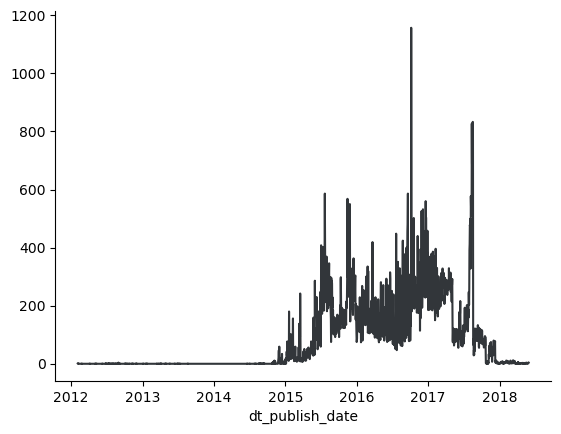

In [117]:
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.lineplot(data=grouped_cal_day, color='#32363A') 
sns.despine() 
plt.show()

Die Darstellung ist viel übersichtlicher, wenn wir auf der Ebene der Wochen statt der Tage zählen.

In [118]:
weekly = tweets_df.resample('W').size() 
weekly.head()

dt_publish_date
2012-02-05    1
2012-02-12    2
2012-02-19    0
2012-02-26    1
2012-03-04    0
Freq: W-SUN, dtype: int64

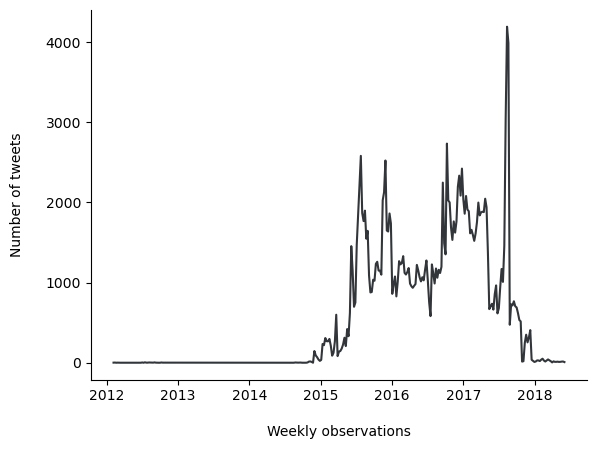

In [119]:
ax = sns.lineplot(data=weekly, color='#32363A') 
ax.set_xlabel('\nWeekly observations') 
ax.set_ylabel('Number of tweets\n') 
sns.despine() 
plt.show()

## Kombinierung von DataFrames

Das Kombinieren von dataframes ist eine sehr häufige Aufgabe. Auch wenn es nicht offensichtlich erscheint, ist das Kombinieren von Datensätzen eine der wertvollsten Fähigkeiten, die man in der rechnergestützten Sozialwissenschaft haben kann. Im Folgenden werden einige der gebräuchlichsten Ansätze betrachtet, nämlich die Verkettung und Zusammenführung, und es wird kurz eine fortgeschrittenere Reihe von Methoden beschrieben, die gemeinhin als Datensatzverknüpfung bezeichnet werden.  

Die Verkettung eines dataframes ist konzeptionell recht einfach - stellen Sie sich vor, Sie hängen die Zeilen oder Spalten eines dataframes unter oder rechts von der letzten Zeile oder Spalte eines anderen dataframes an. Damit dies sinnvoll ist, sollten die beiden dataframes mindestens eine Zeile oder Spalte gemeinsam haben.

In [120]:
full_df = pd.read_csv("../data/vdem/filtered_subset.csv") 
df_australia = full_df.query("country_name == 'Australia'") 
len(df_australia)

120

In [121]:
df_sa = full_df.query("country_name == 'South Africa'") 
len(df_sa)

120

Standardmäßig führt pd.concat() eine zeilenweise Verknüpfung durch, die als Achse=0 bezeichnet wird. Diese Vorgabe kann durch die Angabe von Achse=1 außer Kraft gesetzt werden, wodurch eine spaltenweise Verknüpfung erfolgt:

In [122]:
concatenated = pd.concat([df_australia, df_sa], axis=1)
len(concatenated)

240

Wenn wir die beiden dataframes verketten, bleibt die Anzahl der Spalten gleich, aber die Anzahl der Zeilen erhöht sich, da die Zeilen in beiden ursprünglichen dataframes berücksichtigt werden. Normalerweise würde diese Art der Verkettung zu einer unterschiedlichen Anzahl von Spalten führen, aber in diesem Fall hatten die beiden Dataframes, die wir zusammengefügt haben, genau die gleichen Spalten (was sinnvoll ist, da sie beide aus demselben übergeordneten Dataframe extrahiert wurden).

### Merging

Eine andere Möglichkeit, Datensätze zu kombinieren, ist ihre Zusammenführung. Wenn Sie einen dataframe erstellen möchten, der Spalten aus mehreren Datensätzen enthält, aber in den Zeilen nach einer bestimmten Spalte (oder einem Satz von Spalten) ausgerichtet ist, sollten Sie die Funktion merge() verwenden. Um dies zu veranschaulichen, werden wir mit Daten aus zwei verschiedenen Quellen arbeiten. Die erste Quelle sind die VDEM-Daten, die wir im ersten Teil dieses Kapitels verwendet haben (fsdf). Die zweite ist ein Datensatz von Freedom House über den Grad der Internetfreiheit in 65 Ländern. Weitere Informationen finden Sie unter https://freedomhouse.org/countries/freedom-net/scores.

In [75]:
freedom_df = pd.read_csv( "../data/freedom_house/internet_freedoms_2020.csv")

Um diese dataframes zusammenzuführen, müssen wir eine Spalte finden, mit der wir die Zeilen des einen dataframes mit den Zeilen des anderen abgleichen können. Die Spalten müssen nicht den gleichen Namen haben, sondern nur Werte, die einander zugeordnet werden können. Die von uns gewählten Spalten werden in unserer Zusammenführung als "Schlüssel" bezeichnet. In unserem Fall sind dies die Spalten mit den Ländernamen aus jedem Datensatz.

In [125]:
list(fsdf.columns)

['country_name',
 'country_text_id',
 'e_regiongeo',
 'year',
 'v2x_polyarchy',
 'v2x_libdem',
 'v2x_partipdem',
 'v2x_delibdem',
 'v2x_egaldem',
 'v2smprivex',
 'v2smpolsoc',
 'v2caviol',
 'e_boix_regime',
 '21 Century',
 'missing_political_violence_data',
 'Region']

In [127]:
list(freedom_df.columns)

['Country',
 'Total Score',
 'Status',
 'Obstacles to Access',
 'Limits on Content',
 'Violations of User Rights']

Wir verwenden die Funktion "Zusammenführen", um diese beiden dataframes mit "country_name" und "Country" zu kombinieren. Wir führen einen inner-join durch, was der Standard ist, wenn die Option nicht gesetzt ist, und behalten nur die Schlüssel (d. h. Länder), die in beiden dataframes erscheinen:

In [128]:
merged = pd.merge(fsdf, freedom_df, how='inner', 
                  left_on='country_name', right_on='Country')

In [129]:
print('merged has {} rows and {} columns'.format(len(merged), len(merged.columns)))

merged has 6434 rows and 22 columns


In [131]:
len(fsdf), len(freedom_df)

(18787, 65)

Sie sollten fünf neue Spalten in dem zusammengeführten dataframe im Vergleich zu dem fsdf-Dataframe sehen. Beachten Sie, wie viele Zeilen jeder der beiden dataframes hat: viel weniger Zeilen als der ursprüngliche VDEM dataframe, aber viel mehr als der Freedom House dataframe. Wenn also in unserem Fall das Land einer Zeile in dem anderen Datensatz nicht vorkommt, wird diese Zeile nicht in den zusammengeführten dataframe aufgenommen.  

Dies kann mit dem Parameter how angepasst werden. Es gibt fünf Möglichkeiten, dataframes in Pandas zusammenzuführen: left, right, outer, inner und cross. In der Dokumentation können Sie nachlesen, wie die anderen vier Methoden funktionieren.  